In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
dataset = pd.read_csv('http://iali.in/datasets/IEEEAPSIT/unsupervised-ml/Wholesale%20customers%20data.csv')
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [12]:
dataset.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [0]:
indices = [22,154,398]


In [14]:
samples = pd.DataFrame(dataset.loc[indices], columns=dataset.keys()).reset_index(drop=True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,31276,1917,4469,9408,2381,4334
1,1,3,622,55,137,75,7,8
2,1,3,11442,1032,582,5390,74,247


In [0]:
pcts = 100. * dataset.rank(axis=0, pct=True).iloc[indices].round(decimals=3)

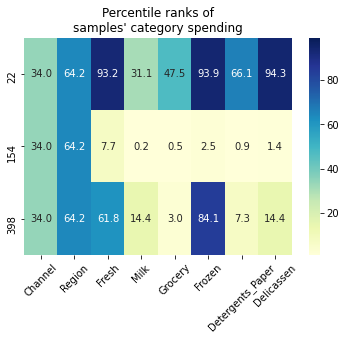

In [16]:
sns.heatmap(pcts, annot=True, vmin=1, vmax=99, fmt='.1f', cmap='YlGnBu')
plt.title('Percentile ranks of\nsamples\' category spending')
plt.xticks(rotation=45, ha='center');

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

new_dataset = dataset.drop('Grocery',axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(new_dataset, dataset['Grocery'], test_size=0.25, random_state=1)

In [29]:
regressor =  DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [30]:
score = regressor.score(X_test, y_test)
print(score)

0.8017992480327141


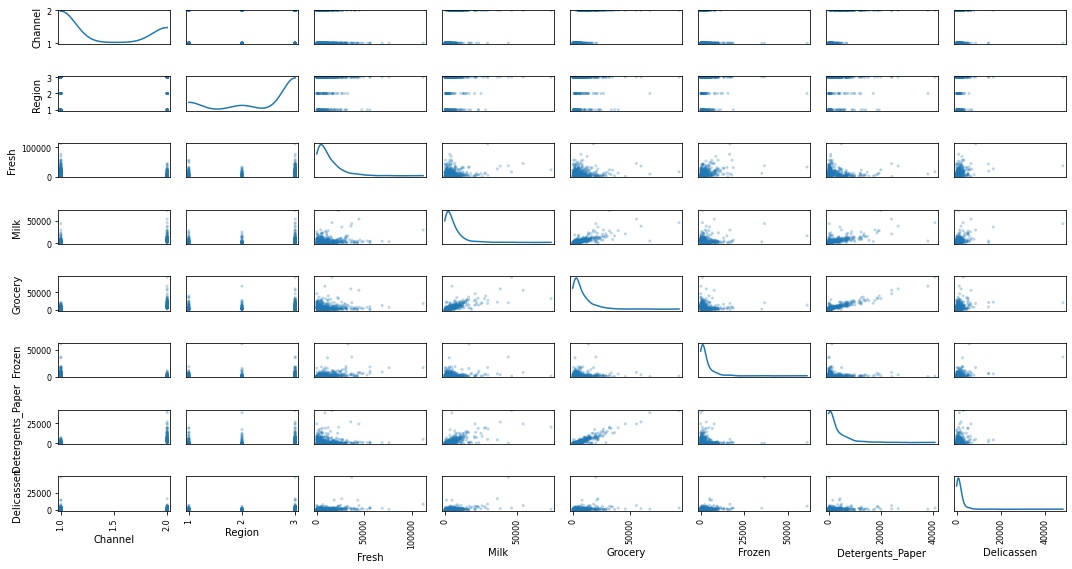

In [31]:
pd.plotting.scatter_matrix(dataset, alpha=0.3,figsize=(15,8),diagonal='kde' )
plt.tight_layout() 

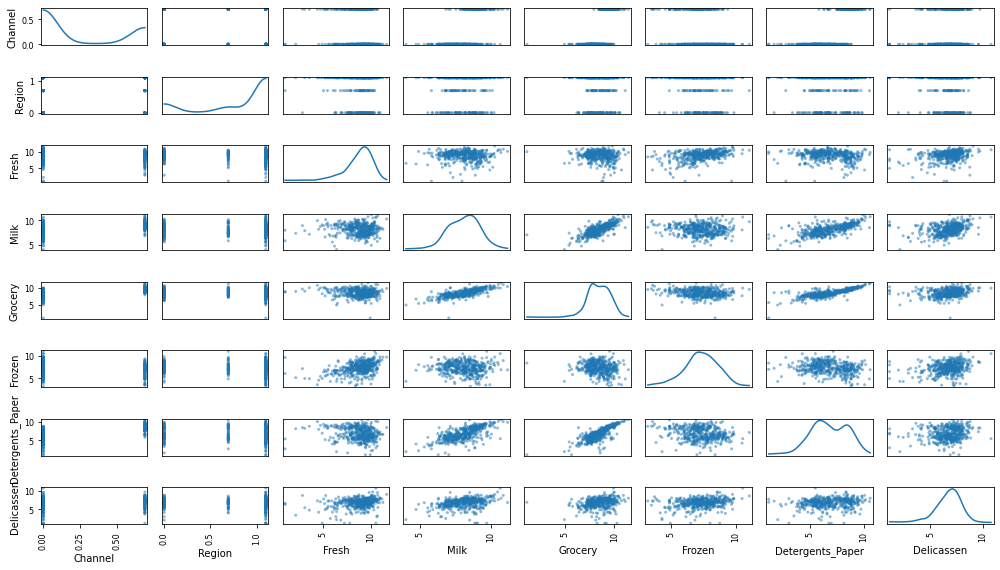

In [32]:
log_dataset = np.log(dataset.copy())


log_samples = np.log(samples)


pd.plotting.scatter_matrix(log_dataset, alpha=0.5, figsize=(14,8),diagonal='kde')
plt.tight_layout()

In [33]:
print("Original chosen samples of wholesale customers dataset:")
display(samples)


print("Log-transformed samples of wholesale customers dataset:")
display(log_samples)

Original chosen samples of wholesale customers dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,31276,1917,4469,9408,2381,4334
1,1,3,622,55,137,75,7,8
2,1,3,11442,1032,582,5390,74,247


Log-transformed samples of wholesale customers dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.0,1.098612,10.350606,7.558517,8.404920,9.149316,7.775276,8.374246
1,0.0,1.098612,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
2,0.0,1.098612,9.345046,6.939254,6.366470,8.592301,4.304065,5.509388
